In [1]:
pwd

'/mmfs1/data/aglinska/BC-fMRI-AE/Notebooks'

In [2]:
%%time
import numpy as np
import pandas as pd
import ants

In [103]:
from matplotlib import pyplot as plt

In [100]:
df = pd.read_csv('../Data/ABIDE_df2.csv')
df

,participant_id,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,...,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,bids_folder,site
0,50002,1,1.0,16.77,1,Ambi,NaN,103.0,116.0,89.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050002,13
1,50003,1,1.0,24.45,1,R,NaN,124.0,128.0,115.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050003,13
2,50004,1,1.0,19.09,1,R,NaN,113.0,108.0,117.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050004,13
3,50005,1,1.0,13.73,2,R,NaN,119.0,117.0,118.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050005,13
4,50006,1,1.0,13.37,1,L,NaN,109.0,99.0,119.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050006,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,51583,1,2.0,35.00,1,NaN,100.0,95.0,105.0,84.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-SBL0051583,14
1044,51584,1,2.0,49.00,1,NaN,100.0,NaN,133.0,135.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,23.24,sub-SBL0051584,14
1045,51585,1,1.0,27.00,1,NaN,90.0,96.0,99.0,106.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-SBL0051585,14
1046,51606,1,2.0,29.00,2,R,NaN,118.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-MaxMuna0051606,6


In [6]:
mepi = ants.image_read('../Data/GlasserAtlas/ABIDE_mepi.nii.gz')
rois = ants.image_read('../Data/GlasserAtlas/glasser360MNI.nii')

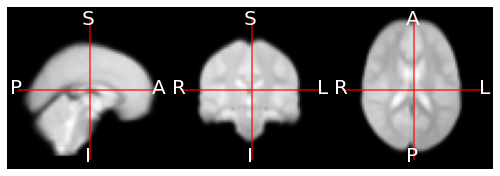

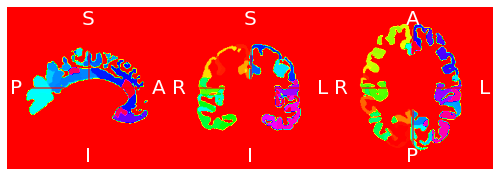

In [10]:
mepi.plot_ortho(flat=True)
rois.plot_ortho(flat=True,cmap='hsv')

In [11]:
mepi

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (61, 73, 61)
	 Spacing    : (3.0, 3.0, 3.0)
	 Origin     : (-90.0, 126.0, -72.0)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [12]:
rois

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (182, 218, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-90.0, 126.0, -72.0)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [85]:
# fixed = mepi
# moving = rois
# tx = ants.registration(fixed=fixed,moving=moving,type_of_transform='BOLDAffine')
# #tx = ants.registration(fixed=fixed,moving=moving,type_of_transform='BOLDAffine',reg_iterations=(400, 200, 100),aff_iterations=(2100, 1200, 1200, 1000))

In [86]:
# epi_rois = ants.apply_transforms(
#     fixed=mepi,
#     moving=rois,
#     transformlist=tx['fwdtransforms'],
#     interpolator='genericLabel')

In [80]:
epi_rois = rois.resample_image_to_target(target=mepi,interp_type='genericLabel')

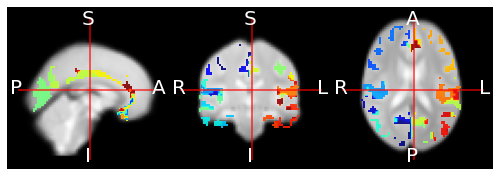

In [81]:
mepi.plot_ortho(epi_rois,flat=True)

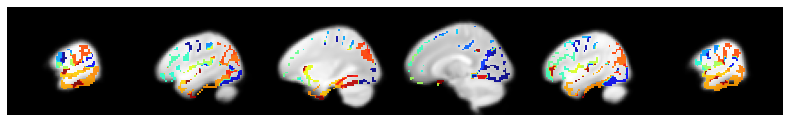

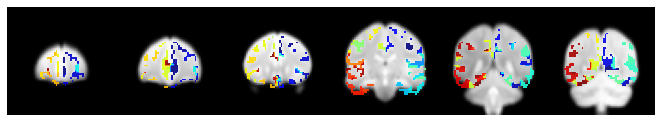

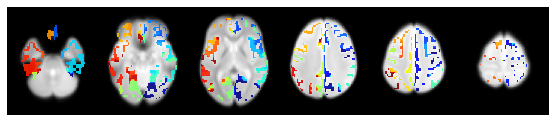

In [82]:
mepi.plot(epi_rois,slices=[10,15,20,35,45,50],axis=0)
mepi.plot(epi_rois,slices=[10,15,20,35,45,50],axis=1)
mepi.plot(epi_rois,slices=[15,20,25,35,40,45],axis=2)

In [84]:
epi_rois.to_filename('../Data/GlasserAtlas/epi_rois.nii.gz')

In [90]:
flat_mepi = mepi.numpy().reshape(-1)
flat_rois = epi_rois.numpy().reshape(-1)

In [97]:
(flat_mepi[flat_rois!=0]==0).sum()

0

### Extract Data

In [99]:
func_dir = '../../data/ABIDE/Outputs/cpac/filt_noglobal/func_preproc/'

In [143]:
import os
funcFiles = [file for file in os.listdir(func_dir) if file.endswith('.nii.gz')]
funcFiles.sort()
funcFile_ids = np.array([int(funcFile.split('_')[-3]) for funcFile in funcFiles])

In [117]:
subs = df['bids_folder'].values
pid = df['participant_id'].values[s]

s = 0

['Pitt_0050002_func_preproc.nii.gz',
 'Pitt_0050003_func_preproc.nii.gz',
 'Pitt_0050004_func_preproc.nii.gz',
 'Pitt_0050005_func_preproc.nii.gz',
 'Pitt_0050006_func_preproc.nii.gz',
 'Pitt_0050007_func_preproc.nii.gz',
 'Pitt_0050008_func_preproc.nii.gz',
 'Pitt_0050009_func_preproc.nii.gz',
 'Pitt_0050010_func_preproc.nii.gz',
 'Pitt_0050011_func_preproc.nii.gz',
 'Pitt_0050012_func_preproc.nii.gz',
 'Pitt_0050013_func_preproc.nii.gz',
 'Pitt_0050014_func_preproc.nii.gz',
 'Pitt_0050015_func_preproc.nii.gz',
 'Pitt_0050016_func_preproc.nii.gz',
 'Pitt_0050017_func_preproc.nii.gz',
 'Pitt_0050019_func_preproc.nii.gz',
 'Pitt_0050020_func_preproc.nii.gz',
 'Pitt_0050022_func_preproc.nii.gz',
 'Pitt_0050023_func_preproc.nii.gz',
 'Pitt_0050024_func_preproc.nii.gz',
 'Pitt_0050025_func_preproc.nii.gz',
 'Pitt_0050026_func_preproc.nii.gz',
 'Pitt_0050027_func_preproc.nii.gz',
 'Pitt_0050028_func_preproc.nii.gz',
 'Pitt_0050029_func_preproc.nii.gz',
 'Pitt_0050030_func_preproc.nii.gz',
 

In [156]:
funcFile = funcFiles[np.argwhere(funcFile_ids==pid)[0][0]]
funcFile

'Pitt_0050002_func_preproc.nii.gz'

In [154]:
fn = func_dir+funcFile

In [155]:
ants.image_read(fn)

ANTsImage
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (61, 73, 61, 196)
	 Spacing    : (3.0, 3.0, 3.0, 1.5)
	 Origin     : (-90.0, 126.0, -72.0, 0.0)
	 Direction  : [ 1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]

In [125]:
df.columns

Index(['participant_id', 'DX_GROUP', 'DSM_IV_TR', 'AGE_AT_SCAN', 'SEX',
       'HANDEDNESS_CATEGORY', 'HANDEDNESS_SCORES', 'FIQ', 'VIQ', 'PIQ',
       'FIQ_TEST_TYPE', 'VIQ_TEST_TYPE', 'PIQ_TEST_TYPE',
       'ADI_R_SOCIAL_TOTAL_A', 'ADI_R_VERBAL_TOTAL_BV', 'ADI_RRB_TOTAL_C',
       'ADI_R_ONSET_TOTAL_D', 'ADI_R_RSRCH_RELIABLE', 'ADOS_MODULE',
       'ADOS_TOTAL', 'ADOS_COMM', 'ADOS_SOCIAL', 'ADOS_STEREO_BEHAV',
       'ADOS_RSRCH_RELIABLE', 'ADOS_GOTHAM_SOCAFFECT', 'ADOS_GOTHAM_RRB',
       'ADOS_GOTHAM_TOTAL', 'ADOS_GOTHAM_SEVERITY', 'SRS_VERSION',
       'SRS_RAW_TOTAL', 'SRS_AWARENESS', 'SRS_COGNITION', 'SRS_COMMUNICATION',
       'SRS_MOTIVATION', 'SRS_MANNERISMS', 'SCQ_TOTAL', 'AQ_TOTAL',
       'COMORBIDITY', 'CURRENT_MED_STATUS', 'MEDICATION_NAME',
       'OFF_STIMULANTS_AT_SCAN', 'VINELAND_RECEPTIVE_V_SCALED',
       'VINELAND_EXPRESSIVE_V_SCALED', 'VINELAND_WRITTEN_V_SCALED',
       'VINELAND_COMMUNICATION_STANDARD', 'VINELAND_PERSONAL_V_SCALED',
       'VINELAND_DOMESTIC_V_S